# predicting heart disease using machine learning

## 1.problem Definition
   
   
Given clinical parameters about a  patient , can we predict whether or not they have heart disease?

## 2. Data 

I have collected data from uci heart disease dataset on kaggle.

## 3.Evaluation 

If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

Top 14 are taken

## Preparing the data

we'are going to use pandas,numpy and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve

# load data


In [2]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.shape

(1025, 14)

## Data Exploration (EDA)

THe goal to find more about the data and become a subject matter export on the dataset you're working with.

1.what questions are you trying to serve

2.What kind of data do we have and how do we treat different types?

3.what's missing from the data and how do you deal with it?

4.Where are the outliers and why should you care about them?

5.How can you add,remove or change features to get more out of the data?


In [3]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [4]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

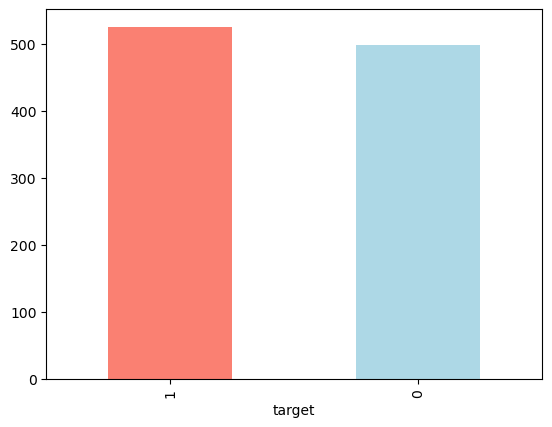

In [6]:

df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [8]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [9]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


## Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,Female,Male
target,,
0,86,413
1,226,300


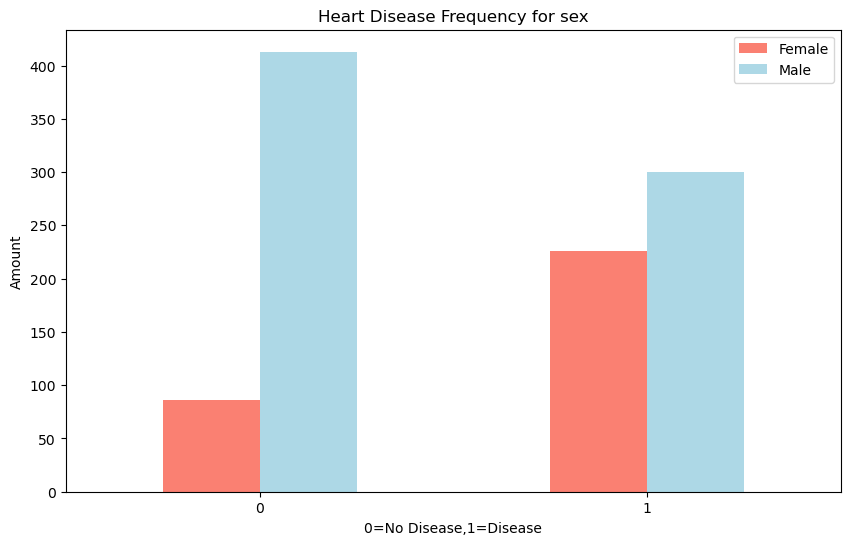

In [12]:
# Based on existing data set --> 72% female is having heart disease,40% male is having heart disease
#
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend((["Female","Male"]))
plt.xticks(rotation=0);

In [13]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [14]:
df["Max_heart_rate"].value_counts()

Max_heart_rate
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

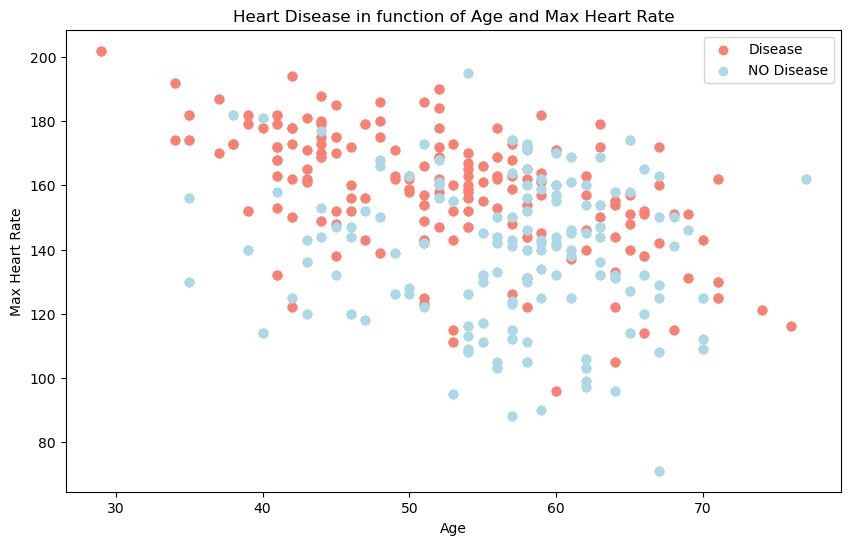

In [15]:
# Age VS Max Heart RATE

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.Max_heart_rate[df.target==1],
           c="salmon")

# Scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.Max_heart_rate[df.target==0],
           c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","NO Disease"])

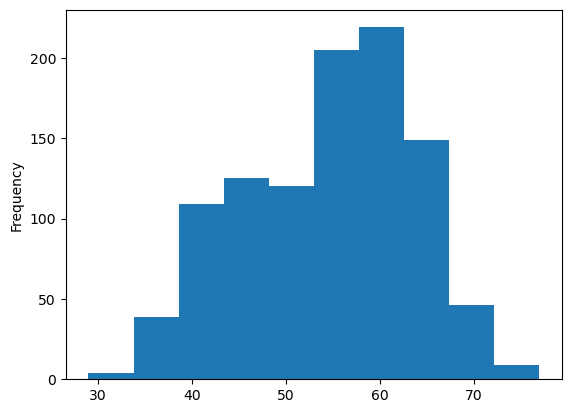

In [16]:
# Check the distributions of the age column with a histogram

df.age.plot.hist();

In [17]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [18]:

## Heart Disease Frequency  per Chest Pain Type
pd.crosstab(df.chest_pain_type,df.target)

target,0,1
chest_pain_type,,
Asymptomatic,26,51
Atypical angina,33,134
Non-anginal pain,65,219
Typical angina,375,122


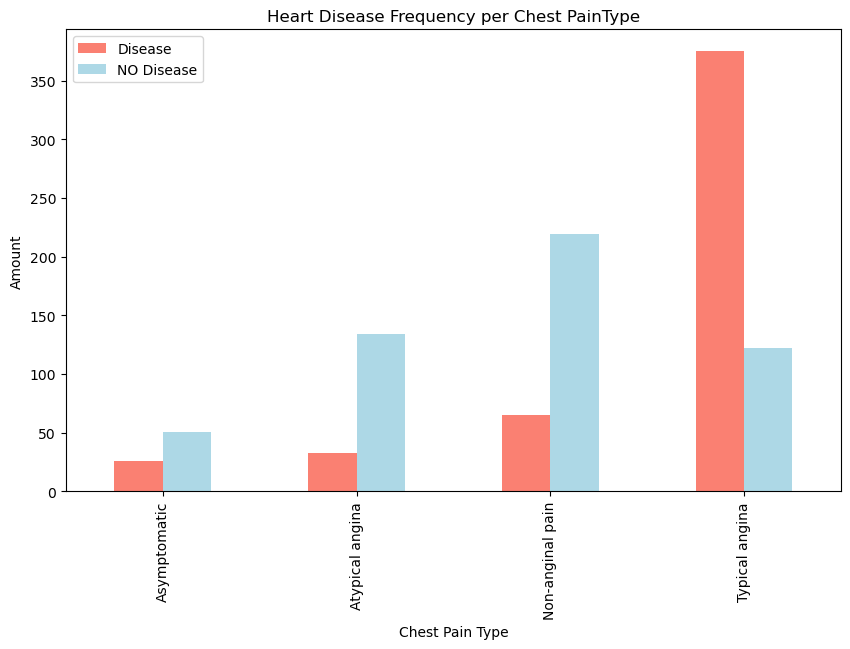

In [19]:
# Make the crosstab more visual

pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per Chest PainType")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease","NO Disease"])


# Building a correlation matrix

In [20]:
gender_mapping={"Male":1,"Female":0}
df["sex"]=df["sex"].replace(gender_mapping)

In [21]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,1,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,1,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,1,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,0,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [22]:
slope_mapping={"Downsloping":0,"Flat":1,"Upsloping":2}
df["slope"]=df["slope"].replace(slope_mapping)

In [23]:
exercise_induced_angina_mapping={"No":0,"Yes":1}
df["exercise_induced_angina"]=df["exercise_induced_angina"].replace(exercise_induced_angina_mapping)

In [24]:
df["chest_pain_type"].value_counts()

chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

In [25]:
chest_pain_type_mapping={"Asymptomatic":0,"Atypical angina":1,"Non-anginal pain":2,"Typical angina":3}
df["chest_pain_type"]=df["chest_pain_type"].replace(chest_pain_type_mapping)

In [26]:
fasting_blood_sugar_mapping = {"Lower than 120 mg/ml":0,
                               "Greater than 120 mg/ml":1}
df["fasting_blood_sugar"]=df["fasting_blood_sugar"].replace(fasting_blood_sugar_mapping)

In [27]:
rest_ecg_mapping={"ST-T wave abnormality":1,"Normal":0}
df["rest_ecg"]=df["rest_ecg"].replace(rest_ecg_mapping)

In [28]:
vessels_colored_by_flourosopy_map={"Two":2,"One":1,"Three":3,"Zero":0}
df["vessels_colored_by_flourosopy"]=df["vessels_colored_by_flourosopy"].replace(vessels_colored_by_flourosopy_map)

In [29]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,1,168,0,1.0,0,2,Reversable Defect,0
1,53,1,3,140,203,1,0,155,1,3.1,2,0,Reversable Defect,0
2,70,1,3,145,174,0,1,125,1,2.6,2,0,Reversable Defect,0
3,61,1,3,148,203,0,1,161,0,0.0,0,1,Reversable Defect,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,Fixed Defect,0


In [30]:
thalassemia_map={"Reversable Defect":7,"Fixed Defect":6,"Normal":1}
df["thalassemia"]=df["thalassemia"].replace(thalassemia_map)

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,1,168,0,1.0,0,2,7,0
1,53,1,3,140,203,1,0,155,1,3.1,2,0,7,0
2,70,1,3,145,174,0,1,125,1,2.6,2,0,7,0
3,61,1,3,148,203,0,1,161,0,0.0,0,1,7,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,6,0


In [32]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,1,168,0,1.0,0,2,7,0
1,53,1,3,140,203,1,0,155,1,3.1,2,0,7,0
2,70,1,3,145,174,0,1,125,1,2.6,2,0,7,0
3,61,1,3,148,203,0,1,161,0,0.0,0,1,7,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,6,0


In [33]:
df["rest_ecg"].head(10)

0                               1
1                               0
2                               1
3                               1
4                               1
5                               0
6    Left ventricular hypertrophy
7                               0
8                               0
9                               0
Name: rest_ecg, dtype: object

In [34]:
df = df[df['rest_ecg'] != 'Left ventricular hypertrophy']


In [35]:
df["rest_ecg"]=df.rest_ecg.astype(int)

In [36]:
df["vessels_colored_by_flourosopy"]=df["vessels_colored_by_flourosopy"].replace({"Four":4})

In [37]:
df["vessels_colored_by_flourosopy"]=df["vessels_colored_by_flourosopy"].astype(int)

In [38]:
df.dtypes

age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int32
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int32
thalassemia                       object
target                             int64
dtype: object

In [39]:
df=df[df["thalassemia"]!="No"]

In [40]:
df["thalassemia"]=df["thalassemia"].astype(int)

In [41]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,-0.095391,0.109670,0.275598,0.227939,0.130091,-0.169609,-0.387369,0.096814,0.209633,0.164894,0.278403,0.002261,-0.239327
sex,-0.095391,1.000000,0.012543,-0.061604,-0.208283,0.013920,-0.025187,-0.077767,0.152590,0.094359,0.026046,0.101695,0.003958,-0.286014
chest_pain_type,0.109670,0.012543,1.000000,-0.037778,0.066492,-0.028432,-0.072874,-0.350366,0.395384,0.212584,0.148346,0.205688,0.062578,-0.408020
resting_blood_pressure,0.275598,-0.061604,-0.037778,1.000000,0.119845,0.192344,-0.157164,-0.025712,0.047528,0.185108,0.125951,0.125010,-0.043403,-0.138035
cholestoral,0.227939,-0.208283,0.066492,0.119845,1.000000,0.037127,-0.175323,-0.019688,0.070170,0.039588,0.002206,0.063657,0.123331,-0.092370
fasting_blood_sugar,0.130091,0.013920,-0.028432,0.192344,0.037127,1.000000,-0.104376,-0.019988,0.038880,0.020250,0.063006,0.148763,-0.081068,-0.035056
rest_ecg,-0.169609,-0.025187,-0.072874,-0.157164,-0.175323,-0.104376,1.000000,0.090755,-0.097355,-0.125524,-0.145990,-0.097321,0.033672,0.180050
Max_heart_rate,-0.387369,-0.077767,-0.350366,-0.025712,-0.019688,-0.019988,0.090755,1.000000,-0.386842,-0.348784,-0.399054,-0.218636,0.051931,0.431706
exercise_induced_angina,0.096814,0.152590,0.395384,0.047528,0.070170,0.038880,-0.097355,-0.386842,1.000000,0.314436,0.270036,0.120849,0.036671,-0.430665
oldpeak,0.209633,0.094359,0.212584,0.185108,0.039588,0.020250,-0.125524,-0.348784,0.314436,1.000000,0.563472,0.208731,0.053425,-0.429439


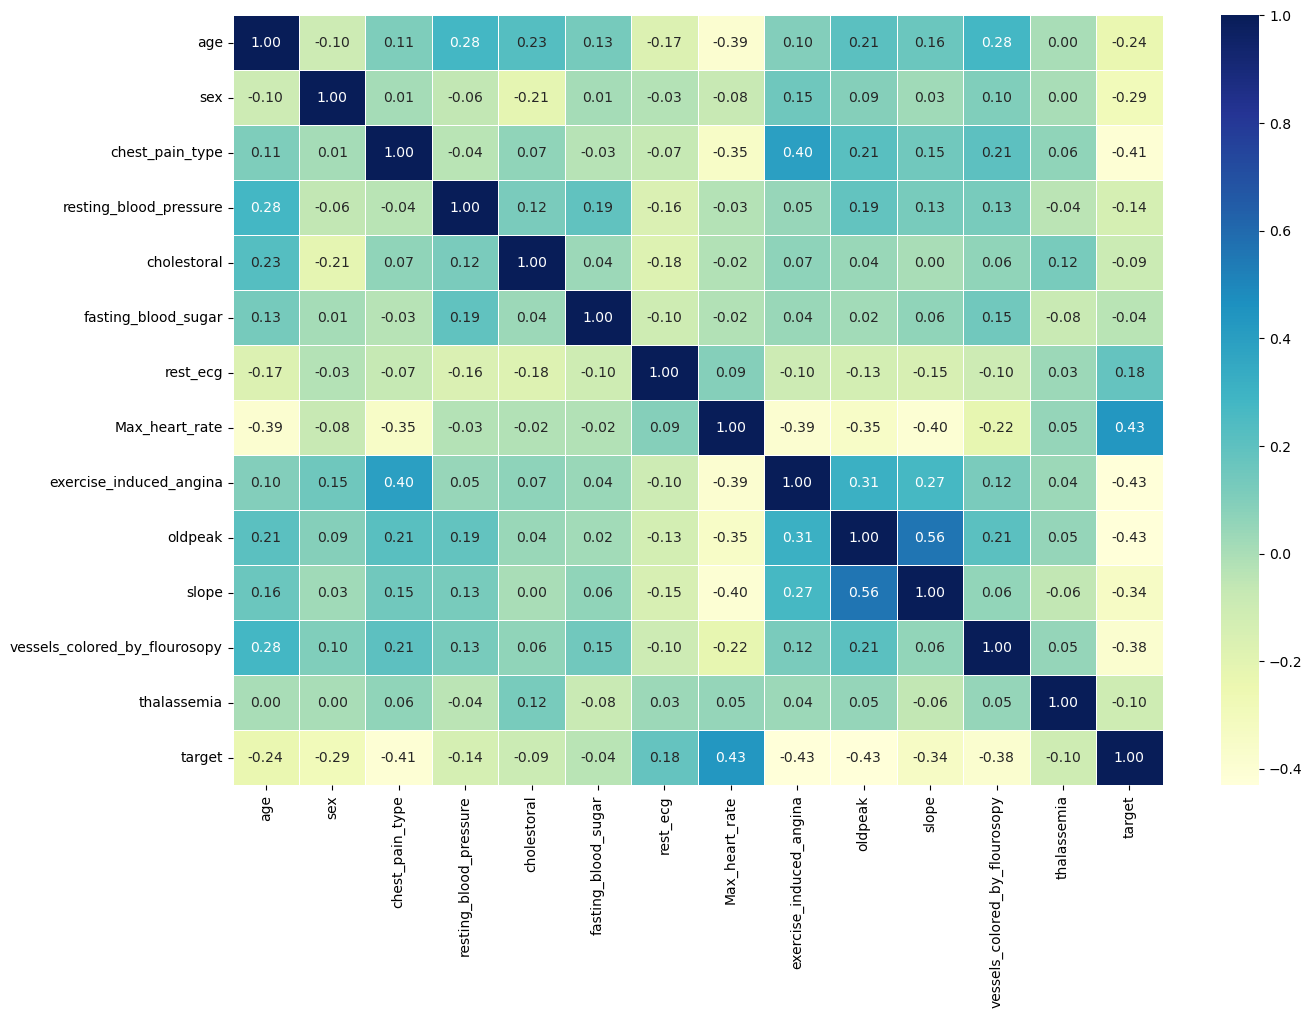

In [42]:
import seaborn as sns
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


higher positive value -- higher correlation


negative correlation = a relationship between two variables in which one variable increases as the other decreases.

eg:- if anybody gets pain during exercise,their having heartdisease rate is low

## 5.MODELLING

In [43]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,1,168,0,1.0,0,2,7,0
1,53,1,3,140,203,1,0,155,1,3.1,2,0,7,0
2,70,1,3,145,174,0,1,125,1,2.6,2,0,7,0
3,61,1,3,148,203,0,1,161,0,0.0,0,1,7,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,6,0


In [44]:
# Split the data into x and y
X = df.drop("target",axis=1)
Y = df["target"]

In [45]:
X

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,0,1,168,0,1.0,0,2,7
1,53,1,3,140,203,1,0,155,1,3.1,2,0,7
2,70,1,3,145,174,0,1,125,1,2.6,2,0,7
3,61,1,3,148,203,0,1,161,0,0.0,0,1,7
4,62,0,3,138,294,1,1,106,0,1.9,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,0,0,6
1021,60,1,3,125,258,0,0,141,1,2.8,1,1,7
1022,47,1,3,110,275,0,0,118,1,1.0,1,1,6
1023,50,0,3,110,254,0,0,159,0,0.0,0,0,6


In [46]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1003, dtype: int64

In [47]:
np.random.seed(42)

# Split into train and test split

X_train ,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.2)


In [48]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
81,49,1,2,118,149,0,0,126,0,0.8,0,3,6
32,57,1,3,130,131,0,1,115,1,1.2,1,1,7
285,71,0,2,110,265,1,0,130,0,0.0,0,1,6
516,60,1,3,130,206,0,0,132,1,2.4,1,2,7
650,62,1,3,120,267,0,1,99,1,1.8,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,44,1,3,110,197,0,0,177,0,0.0,0,1,6
275,56,1,3,130,283,1,0,103,1,1.6,2,0,7
876,61,1,3,140,207,0,0,138,1,1.9,0,1,7
443,57,1,2,150,168,0,1,174,0,1.6,0,0,6


In [49]:
Y_train

81     0
32     0
285    1
516    0
650    0
      ..
110    0
275    0
876    0
443    1
106    0
Name: target, Length: 802, dtype: int64

Now w've got data split into training and test sets,its time to build machine learning model

We'll train it(find the patterns) on the training set..

And we'll test it (use the patterns) on the test set.

1.Logistic Regression
2.K-Nearest Neighbours Classifier
3.Random Forest Classifier

In [50]:
# Put models in a dictionary

models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name,model in models.items():
        # Fit the model to the data 
        model.fit(X_train,Y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores
    

In [51]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

C:\Users\pathi\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7761194029850746,
 'KNN': 0.7611940298507462,
 'Random Forest': 1.0}

## Model Comparison

In [52]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

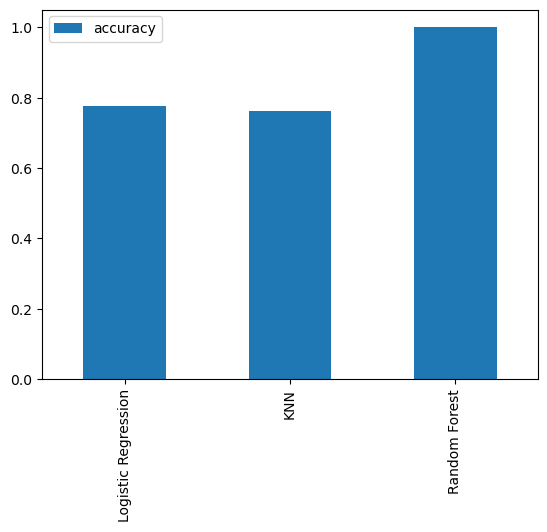

In [53]:
model_compare.T.plot.bar();

Now we've got  a baseline model's first predictions are'nt always what we should based our next steps off.what should we do ?


Let's look at the following:

* HyperParameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### HyperParameter Tuning

In [55]:
# lets tune KNN

train_scores=[]
test_scores=[]

#create a list of different values for n-neighbors

neighbors = range(1,21)

#Set up knn instance

knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    
    #Update the test scores list
    
    test_scores.append(knn.score(X_test,Y_test))



In [56]:
test_scores

[0.9850746268656716,
 0.9502487562189055,
 0.9154228855721394,
 0.8109452736318408,
 0.7611940298507462,
 0.7960199004975125,
 0.7711442786069652,
 0.7711442786069652,
 0.7661691542288557,
 0.746268656716418,
 0.7412935323383084,
 0.7313432835820896,
 0.7164179104477612,
 0.7412935323383084,
 0.7711442786069652,
 0.7562189054726368,
 0.7562189054726368,
 0.7860696517412935,
 0.7960199004975125,
 0.8059701492537313]

In [57]:
train_scores

[1.0,
 0.9962593516209476,
 0.9925187032418953,
 0.9501246882793017,
 0.9276807980049875,
 0.8204488778054863,
 0.7817955112219451,
 0.756857855361596,
 0.7593516209476309,
 0.7655860349127181,
 0.7581047381546134,
 0.7680798004987531,
 0.7643391521197007,
 0.7680798004987531,
 0.7643391521197007,
 0.7518703241895262,
 0.7443890274314214,
 0.7543640897755611,
 0.7543640897755611,
 0.7655860349127181]

Maximum KNN score on the test data:98.507463%


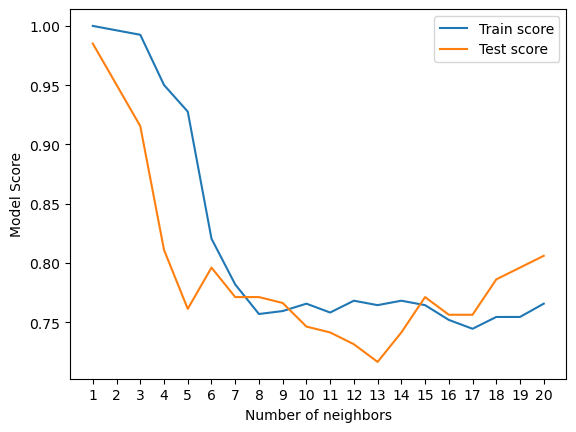

In [58]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")

plt.xticks(np.arange(1,21,1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")

plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:2f}%")

## HyperParameter tuning with Randomized Search CV

We're going to tune:
* LogisticRegresssion()
* RandomForestClassifier()

..using RandomizedSearchCV

In [59]:
# Create a hyperparameter grid for logistic Regression

log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2)}


In [60]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])}

Now we've got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV...

In [61]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameters search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for logistic Regression

rs_log_reg.fit(X_train,Y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [63]:
score=rs_log_reg.score(X_test,Y_test)

In [64]:
score

0.8109452736318408

Now we've tuned LogisticREgression(),we will do the same for RandomForestClassifier()

In [65]:
# Set Up random seed 

np.random.seed(42)

# Set up random hyperparmater search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fit Random hyperparameters search model for RandomForestClassifier()

rs_rf.fit(X_train,Y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [66]:
# find the best hyperparameters

rs_rf.best_params_



{'n_estimators': 960, 'min_samples_split': 4, 'max_depth': None}

In [67]:
# Evaluate the randomized search RandomForestClassifierr
rs_rf.score(X_test,Y_test)

1.0

In [68]:
model_scores

{'Logistic Regression': 0.7761194029850746,
 'KNN': 0.7611940298507462,
 'Random Forest': 1.0}

1.by hand
2. RandomizedSearchCV
3. GridSearchCV


# Hyperparameter tuning using Grid Search Cv


Since our LogisticRegression model provides the best scores so far,we'll try and improve them again using GridSearchCV


In [69]:
#Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,verbose=True)

# Fit grid hyperparameter search model

gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
# Check the best hyperparamataers

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [71]:
# Evaluate the grid search LogisticRegression model

gs_log_reg.score(X_test,Y_test)


0.8109452736318408

In [72]:
model_scores

{'Logistic Regression': 0.7761194029850746,
 'KNN': 0.7611940298507462,
 'Random Forest': 1.0}

## Evaluating our tuned machine learning classifier,beyond accuracy 

* ROC curve and AUC curve
* Confusion matrix 
* Classification report
* Precision
* Recall
* F1-Score


To make comparisions and evaluate our trained model ,first we need to make predictions



In [73]:
y_preds = gs_log_reg.predict(X_test)

In [74]:
Y_test

638    0
641    0
863    0
523    0
373    0
      ..
213    1
793    1
341    1
215    1
357    0
Name: target, Length: 201, dtype: int64

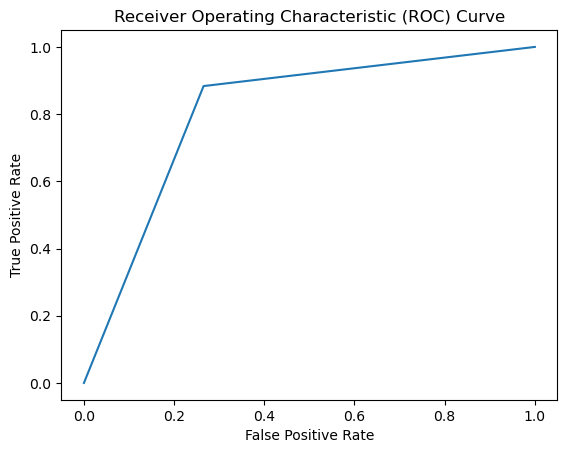

In [75]:
# Plot roc currve and calculate and calcualte AuC metri
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Train your binary classification model on training data and obtain predictions or predicted probabilities on test data
# y_pred_prob = model.predict_proba(X_test)[:, 1] # Assuming your model is already trained

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [77]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix


print(confusion_matrix(Y_test,y_preds))

[[72 26]
 [12 91]]


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set the font size for seaborn plots
sns.set(font_scale=1.5)

def conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    # Compute the confusion matrix
    confusion = confusion_matrix(y_test, y_preds)

    # Plot the confusion matrix using seaborn's heatmap
    sns.heatmap(confusion, annot=True, fmt='d')

    # Add labels and title
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()


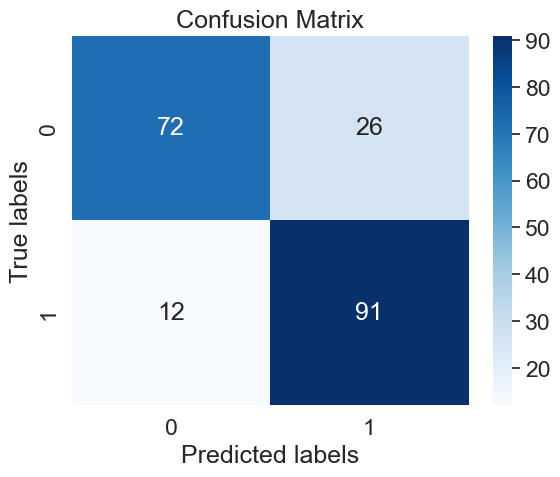

In [97]:
conf_mat(Y_test,y_preds)

print(classification_report(Y_test,y_preds))

In [82]:
from sklearn.metrics import classification_report


In [85]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        98
           1       0.78      0.88      0.83       103

    accuracy                           0.81       201
   macro avg       0.82      0.81      0.81       201
weighted avg       0.82      0.81      0.81       201



## Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`.

In [86]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [87]:
#Create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")



In [93]:
#Cross-validated accuracy 
cv_acc = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8195124378109453

In [94]:
#Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8040230336999976

In [95]:
#Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8634615384615385

In [96]:
#Cross-validated F1 score
cv_f1score= cross_val_score(clf,                  X,                  Y,                  cv=5,                  scoring="accuracy")
cv_f1score=np.mean(cv_acc)
cv_f1score

0.8195124378109453

<Axes: title={'center': 'Cross-validated classification'}>

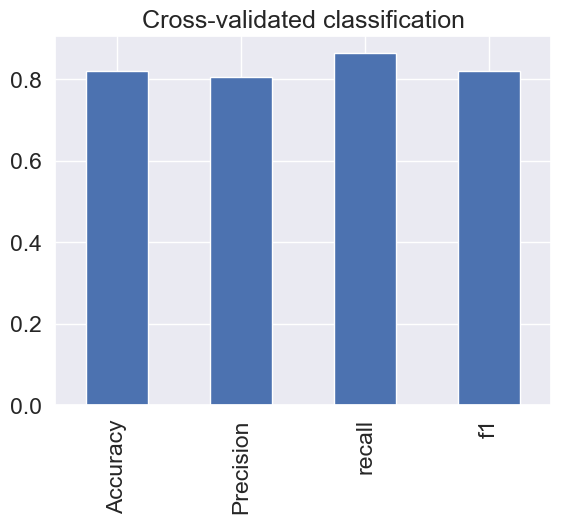

In [103]:
# Visualise cross-validated metrics 

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision":cv_precision,
                          "recall":cv_recall,
                          "f1":cv_f1score
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification",legend=False)

In [102]:
cv_metrics

,Accuracy,Precision,recall,f1
0,0.819512,0.804023,0.863462,0.819512


### Feature Importance

Feature importance is another as asking " which features contributed most to the outcomes of the model
and how did they contribute"?

Finding feature importance is different for each of the machine learning models.

lets find the feature importance for the logistic regression model

(MODEL NAME) feature importance 

In [107]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,0,1,168,0,1.0,0,2,7,0
1,53,1,3,140,203,1,0,155,1,3.1,2,0,7,0
2,70,1,3,145,174,0,1,125,1,2.6,2,0,7,0
3,61,1,3,148,203,0,1,161,0,0.0,0,1,7,0
4,62,0,3,138,294,1,1,106,0,1.9,1,3,6,0


In [111]:
# Fit an instance of Logistic Regression

gs_log_reg.best_params_

clf = LogisticRegression(C=0.1082636733874054,
                        solver='liblinear')
             
clf.fit(X_train,Y_train)
                         

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [112]:
# Check coefficients

clf.coef_

array([[ 0.02070588, -1.23544412, -0.5069283 , -0.00921675, -0.00347512,
         0.04917808,  0.45505322,  0.03404077, -0.73154645, -0.50474789,
        -0.17918605, -0.67898467, -0.20517981]])

In [115]:
# Match Coef's of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [116]:
feature_dict

{'age': 0.020705878996104266,
 'sex': -1.2354441225305506,
 'chest_pain_type': -0.5069283032566688,
 'resting_blood_pressure': -0.00921675098467419,
 'cholestoral': -0.0034751165846394114,
 'fasting_blood_sugar': 0.04917808379282926,
 'rest_ecg': 0.4550532211552756,
 'Max_heart_rate': 0.034040773108087896,
 'exercise_induced_angina': -0.7315464475811985,
 'oldpeak': -0.5047478855043207,
 'slope': -0.17918605023101303,
 'vessels_colored_by_flourosopy': -0.6789846710529263,
 'thalassemia': -0.20517981244335462}

<Axes: title={'center': 'Feature Importance'}>

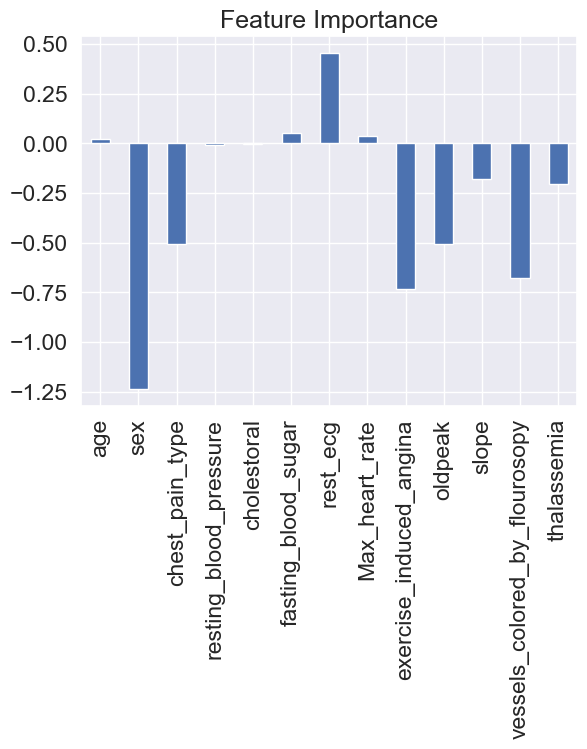

In [117]:
# Visualise Feature importamce

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

## Experimentation

* Improve current model 
* Can you use a better model 
* Could you collect more data
* If your model is good enough ( how would you export it )
